#### Wishlist:

Prep:
- [ ] PCA
    - [X] [Feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)
    - [ ] Correlation matrix
    - [ ] Feature importance plot
- [ ] Use feature engineering to make Name, Cabin, Ticket useful (custom transformer)
- [ ] Regularization?
- [ ] Implement gridsearchcv

Modeling:
- [X] Create an sklearn pipeline
- [ ] Try random forest
- [ ] Try a logistic regression model
- [ ] XGBoost
- [ ] Create an ensemble model
- [ ] Stratification
	* with the plot for why stratification is necessary

Evaluation:
- [X] Print image of decision tree splits
- [X] Confusion matrix
- [ ] [AUC / ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
- [ ] R2 score
- [ ] Quantify information gain from different modifications (create a dictionary of data processing steps and their corresponding information gain, then create a function that will TTS and run a model on the data with the new change)
    - Age: mean, mode, intelligently impute
    - Value of each variable
    - Test size
    - Dropping first col of encoding
    - Ordinal vs nominal encoding

#### Table of Contents

1. [Feature Engineering](#features)
2. [Model Deployment](#model)
3. [Information Gain](#eval)

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

### <a id="features">1. Feature Engineering</a>

In [16]:
DATA_PATH = '~/Documents/Programs/Titanic/'

# print(DATA_PATH + "train.csv")

raw = pd.read_csv(DATA_PATH + 'train.csv', index_col = 'PassengerId')
tblsht = pd.read_csv(DATA_PATH + 'train.csv', index_col = 'PassengerId')

raw_X = raw.drop(columns = ['Survived'])
raw_y = raw.Survived

y = raw['Survived']
X = raw.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [17]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
522,3,male,22.0,0,0,7.8958,S
754,3,male,23.0,0,0,7.8958,S
644,3,male,NaN,0,0,56.4958,S
333,1,male,38.0,0,1,153.4625,S
744,3,male,24.0,1,0,16.1000,S


In [4]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,668.000000,535.000000,668.000000,668.000000,668.000000
mean,2.279940,30.400000,0.517964,0.398204,34.064745
std,0.843576,14.946147,1.069395,0.828718,53.701284
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.925000
50%,3.000000,29.000000,0.000000,0.000000,15.072900
75%,3.000000,39.000000,1.000000,0.000000,31.620825
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 522 to 452
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Sex       668 non-null    object 
 2   Age       535 non-null    float64
 3   SibSp     668 non-null    int64  
 4   Parch     668 non-null    int64  
 5   Fare      668 non-null    float64
 6   Embarked  666 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 41.8+ KB


#### Observations:
- Age is missing ~130 values
- Cabin has a lot of nulls
- Name, Ticket, Cabin not imputable for now
- Embarked has a couple nulls

### Creating a pipeline

In [19]:
# numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# categorical_features = data.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns
cat_cols = ['Sex', 'Embarked']

num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('numeric', num_trans, num_cols),
        ('categorical', cat_trans, cat_cols)
    ]
)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=8))
])

In [29]:
model = pipeline.fit(X_train, y_train)

# Check the transformed output of the preprocessor
# X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

results = model.predict(X_test)

print(model.score(X_test, y_test))

0.7713004484304933


### <a id="eval">3. Evaluation</a>

#### Decision tree plot

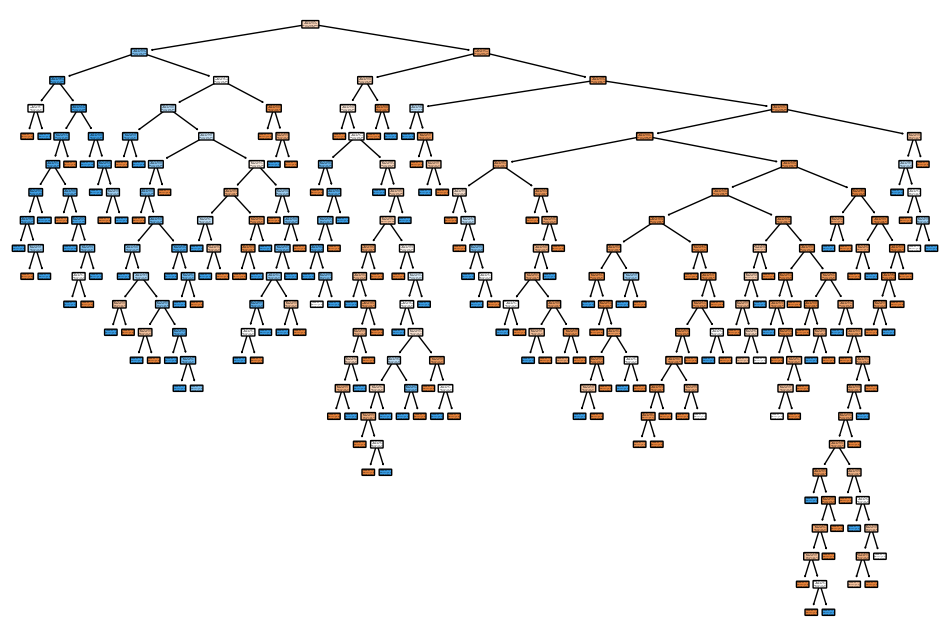

In [32]:
plt.figure(figsize=(12, 8))
plot_tree(pipeline.named_steps['model'], filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()

#### Confusion Matrix

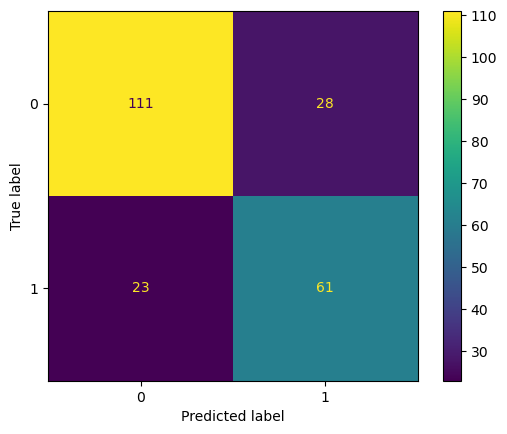

In [30]:
cm = confusion_matrix(y_test, results)
cm_display = ConfusionMatrixDisplay(cm).plot()

#### Baseline

Success is based on 1's and 0's (survived or didn't).

I can achieve a score of 62% just by guessing 0 every time. This is the baseline I'll be trying to beat.

In [ ]:
print(train.Survived.value_counts())

print(549 / (549 + 342))